<a href="https://colab.research.google.com/github/Demon-God-King/GoogleColab/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Packages **

In [19]:
import seaborn as sn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

**Loading the Data**

In [4]:
data = pd.read_csv("/content/drive/MyDrive/DataSet/creditcard.csv")

**Understanding the Data**

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

**Imbalance in the data**

In [10]:
fraud = data[data['Class']==1]
valid = data[data['Class']==0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Transactions: {}'.format(len(valid)))

# print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
# print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


Out of all transactions, only 0.17% were fraudulent. Data are very unbalanced. If we don't acquire good accuracy after applying our models without balancing the dataset, then we can figure out how to do so. But first, let's put the model into practice without it; we'll merely balance the data as necessary.

**Amount details for fraudulent transaction**

In [12]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

**Amount details for normal transaction**

In [13]:
print("Amount details of the normal transaction")
valid.Amount.describe()

Amount details of the normal transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

This makes it abundantly evident that the typical Money transaction for the fraudulent ones is higher.

**Plotting the Correlation Matrix**

The correlation matrix helps us identify the features that are most important for the prediction by visually illustrating how features relate to one another.

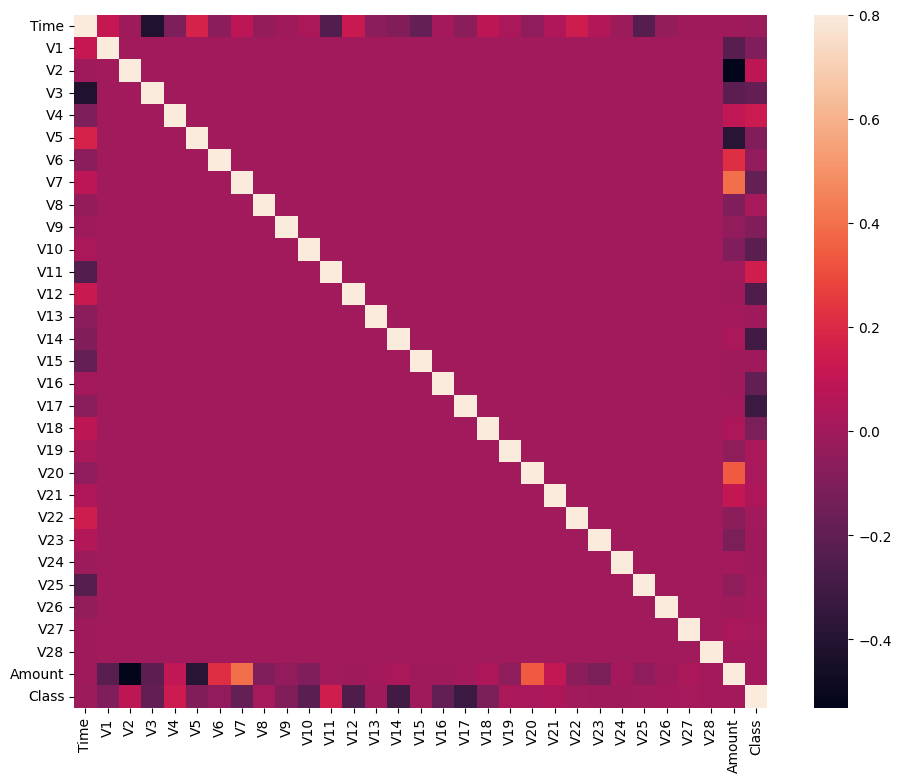

In [15]:
corMatrix = data.corr()
fig = plt.figure(figsize=(12,9))
sn.heatmap(corMatrix,vmax=.8,square=True)
plt.show()

The HeatMap makes it evident that while most features do not correlate with one another, others do have either a positive or negative correlation with one another. For instance, the features labeled Amount and V2 and V5 have a strong negative correlation. Additionally, we observe a connection between V20 and Amount. This helps us comprehend the Data we have at our disposal better.

**Seperating the X and Y values**

The data is split into input parameters and output value formats

In [16]:
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)

xData = X.values
yData = Y.values

(284807, 30)
(284807,)


**Training and Testing Data Bifurcation**

The dataset will be split into two primary categories. One is used to train the model, and the other is used to test how well it performs.

In [18]:
xTrain,xTest,yTrain,yTest= train_test_split(xData,yData,test_size=0.3,random_state=42)

**Random Forest Model**

In [20]:
rfc = RandomForestClassifier()
rfc.fit(xTrain,yTrain)

yPred = rfc.predict(xTest)

**Evaluating parameters**

In [21]:
n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9996137776061234
The precision is 0.9478260869565217
The recall is 0.8014705882352942
The F1-Score is 0.8685258964143425
The Matthews correlation coefficient is0.8713980049126023


**Confusion Matrix**

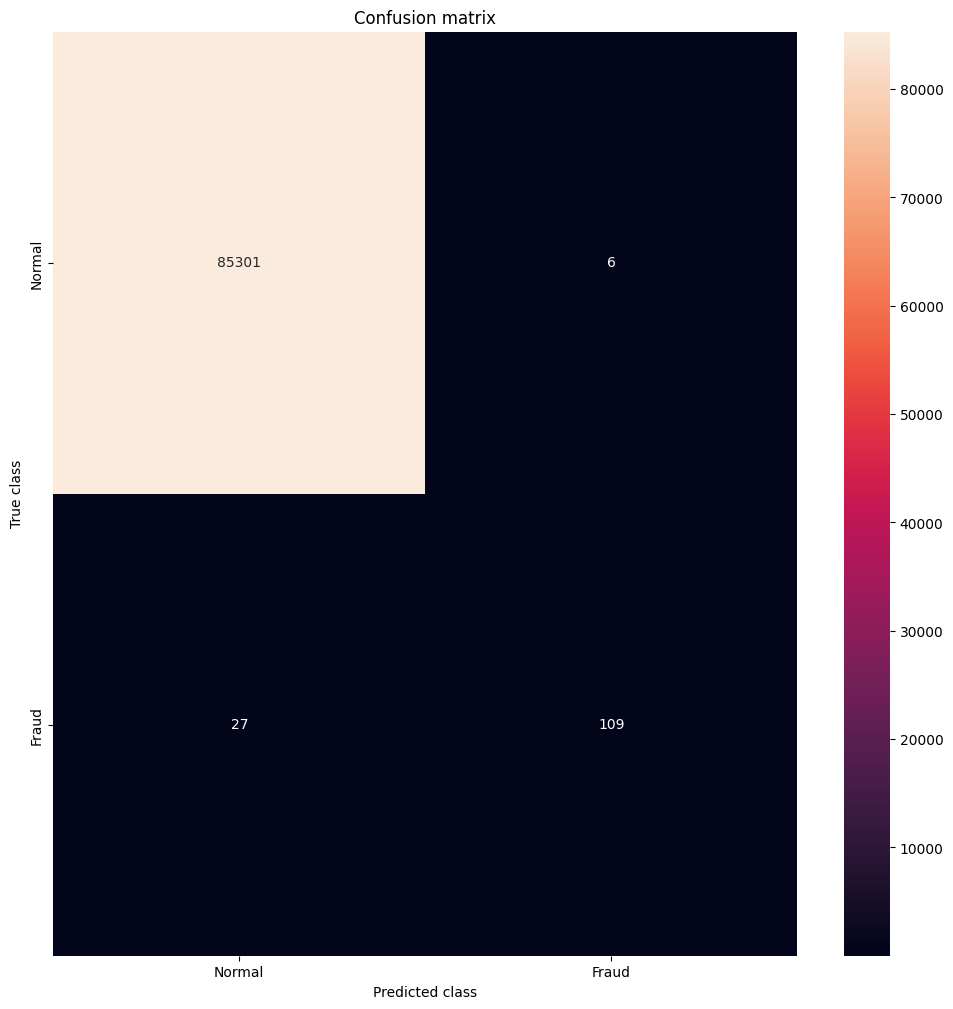

In [24]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sn.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()